In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
train_data = pd.read_csv("train.csv")

In [6]:
train_data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_data.tail()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0
4208,8417,110.85,z,r,ae,c,d,aa,g,w,...,1,0,0,0,0,0,0,0,0,0


# Exploratory Data Analysis

In [8]:
train_data.shape

(4209, 378)

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [10]:
ans = pd.isnull(train_data['ID']).value_counts()
ans

False    4209
Name: ID, dtype: int64

In [11]:
ans.index

Index([False], dtype='object')

# Step 1:  Check for null values in each and every column

In [12]:
count = 0
for x in train_data.columns:
    isnullCheck = pd.isnull(train_data[x]).value_counts()
    if((isnullCheck.index) == (True)):
        count+=1
print(str(count) +" column has null values")

0 column has null values


# No column has null values

# Step 2 : Check for outliers

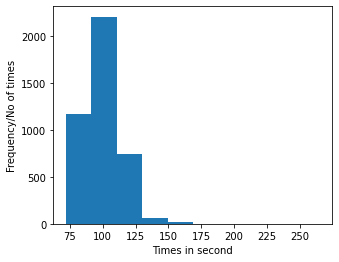

In [13]:
plt.figure(figsize=(5,4))
plt.hist(train_data['y'])
plt.xlabel("Times in second")
plt.ylabel("Frequency/No of times")
plt.show()

In [14]:
# There are some outliers in the above graph

# Feature Engineering
# Check for categorical, Binary and constant features

In [15]:
constant_feature=[]
binary_feature=[]
categorical_feature=[]
for x in train_data.columns:
    if 'X' in x:
        val = np.array(train_data[x].unique())
        value = len(val)
        if( value == 1):
            constant_feature.append(x)
        elif( value == 2):
            binary_feature.append(x)
        else:
            categorical_feature.append(x)
print("constant Feature = " + str(len(constant_feature)))
print("Binary Feature = " + str(len(binary_feature)))
print("Categorical Feature = " + str(len(categorical_feature)))

constant Feature = 12
Binary Feature = 356
Categorical Feature = 8


# Model with XG Boost

In [16]:
test_data = pd.read_csv("test.csv")

In [42]:
x_train = train_data[categorical_feature]
Y_train = train_data['y'].values
x_test = test_data[categorical_feature]
y_test = test_data['ID']

In [43]:
for x in categorical_feature:
    mapper = lambda x: sum(ord(digit) for digit in x)
    x_train[x] = x_train[x].apply(mapper)
    x_test[x] = x_test[x].apply(mapper)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [44]:
x_train

,X0,X1,X2,X3,X4,X5,X6,X8
0,107,118,213,97,100,117,106,111
1,107,116,215,101,100,121,108,111
2,219,119,110,99,100,120,106,120
3,219,116,110,102,100,120,108,101
4,219,118,110,102,100,104,100,110
...,...,...,...,...,...,...,...,...
4204,204,115,212,99,100,194,100,113
4205,106,111,116,100,100,194,104,104
4206,204,118,114,97,100,194,103,101
4207,205,114,101,102,100,194,108,117


In [45]:
Y_train

array([130.81,  88.53,  76.26, ..., 109.22,  87.48, 110.85])

In [21]:
train_data['X0'].head()

0     k
1     k
2    az
3    az
4    az
Name: X0, dtype: object

In [22]:
ord('k')

107

In [26]:
x_train.shape

(4209, 8)

In [47]:
Y_train.shape

(4209,)

# Modeling

In [49]:
import xgboost as xgb

from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(x_train,Y_train,test_size=0.2,random_state=42)

d_train = xgb.DMatrix(X_train,label=y_train)
d_valid = xgb.DMatrix(X_valid,label=y_valid)
d_test = xgb.DMatrix(x_test)

params = {}

params['Objective'] = 'reg:linear'

params['eta'] = 0.02

params['max_depth'] = 4

def xgb_r2score(preds,dtrain):
    labels = dtrain.get_label()
    return 'r2',r2_score(labels,preds)

watchlist = [(d_train,'Train'),(d_valid,'Validation')]

clf = xgb.train(params,d_train,1000,watchlist,early_stopping_rounds=50,
                feval=xgb_r2score,maximize=True,verbose_eval=10)

[16:17:48] WARNING: /workspace/src/learner.cc:328: 
Parameters: { Objective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Train-rmse:98.99499	Validation-rmse:98.88541	Train-r2:-59.49493	Validation-r2:-61.82254
Multiple eval metrics have been passed: 'Validation-r2' will be used for early stopping.

Will train until Validation-r2 hasn't improved in 50 rounds.
[10]	Train-rmse:81.13201	Validation-rmse:81.05647	Train-r2:-39.63282	Validation-r2:-41.21106
[20]	Train-rmse:66.58110	Validation-rmse:66.53622	Train-r2:-26.36493	Validation-r2:-27.44248
[30]	Train-rmse:54.71517	Validation-rmse:54.69167	Train-r2:-17.48025	Validation-r2:-18.21735
[40]	Train-rmse:45.06698	Validation-rmse:45.05594	Train-r2:-11.53746	Validation-r2:-12.04233
[50]	Train-rmse:37.24511	Validation-rmse:37.2431

# Predict the output

In [50]:
p_test = clf.predict(d_test)

prediction = pd.DataFrame()

prediction['ID'] = y_test
prediction['y'] = p_test

In [51]:
prediction.head()

,ID,y
0,1,77.835999
1,2,95.389694
2,3,77.872467
3,4,76.158180
4,5,111.108673
